In [16]:
import numpy as np
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, LSTM,Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
#import seaborn as sb




In [17]:
df=pd.read_csv('/Users/yildizlarkusagi/Desktop/weather/humid_forecast.csv')
cols=list(df)[1:3]
df_for_train=df[cols].astype(float)
scaler=StandardScaler()
scaler=scaler.fit(df_for_train)
df_for_train_scaled=scaler.transform(df_for_train)

xtrain=[]
ytrain=[]

train_years= pd.to_datetime(df['Year'])

n_predicts=1
n_past=10

for i in range(n_past,len(df_for_train_scaled)-n_predicts+1):
    xtrain.append(df_for_train_scaled[i-n_past:i,1:df_for_train.shape[1]])
    ytrain.append(df_for_train_scaled[i+n_predicts-1:i+n_predicts,1])
xtrain,ytrain=np.array(xtrain),np.array(ytrain)

print('The shape of xtrain is===:{}'.format(xtrain.shape))
print('The shape of ytrain is===:{}'.format(ytrain.shape))



The shape of xtrain is===:(72, 10, 1)
The shape of ytrain is===:(72, 1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 32)            4352      
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
2/2 - 7s - loss: 1.0466 - val_loss: 0.4987 - 7s/epoch - 3s/step
Epoch 2/400
2/2 - 0s - loss: 1.0523 - val_loss: 0.4981 - 97ms/epoch - 49ms/step
Epoch 3/400
2/2 - 0s - loss:

KeyError: 'mse'

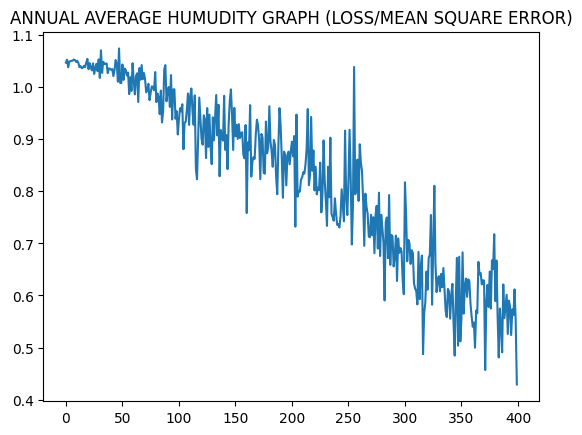

In [18]:
#defining the model here

model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(xtrain.shape[1],xtrain.shape[2]),return_sequences=True))
model.add(LSTM(16,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(ytrain.shape[1]))
model.compile(optimizer='adam',loss='mse')
model.summary()

#fitting the model

histoz=model.fit(xtrain,ytrain,epochs=150,batch_size=50,validation_split=0.1,verbose=2)

#plotting the training graph
plt.title('ANNUAL AVERAGE HUMUDITY GRAPH (LOSS/MEAN SQUARE ERROR)')
plt.plot(histoz.history['loss'],label='Training loss')
plt.plot(histoz.history['val_loss'],label='Validation loss')
plt.legend()


n_predicts=5
forecast_period_years=pd.date_range(list(train_years)[-1],periods=n_predicts,freq='1y').tolist()
forecast=model.predict(xtrain[-n_predicts:])

forecast_copies=np.repeat(forecast,df_for_train.shape[1],axis=-1)
y_predict_future=scaler.inverse_transform(forecast_copies)[:,0]










